Université Paul Sabatier

EIMAB3H1 - Analyse et exploitation de données

Enseignant : **José G. Moreno**

# TP 3. Résumé automatique

Les résumés automatiques sont devenus un moyen commun pour explorer de grandes collections de documents.

Les défis de la génération automatique de résumés résident dans l'extraction de points importants du document. Par exemple, un bon système de résumé automatique du printemps arabe devrai capturer des événements comme "le président de l'Egypte, Hosni Moubarak, a démissionné le 11 février 2011. ", "Mouammar Kadhafi a été tué le 20 octobre 2011.", etc.

Dans ce TP nous utiliserons une collection de critiques d’utilisateurs sur 5 produits afin de construire un résumé automatique pour chaque produit de type extractif comme vu dans le cours.

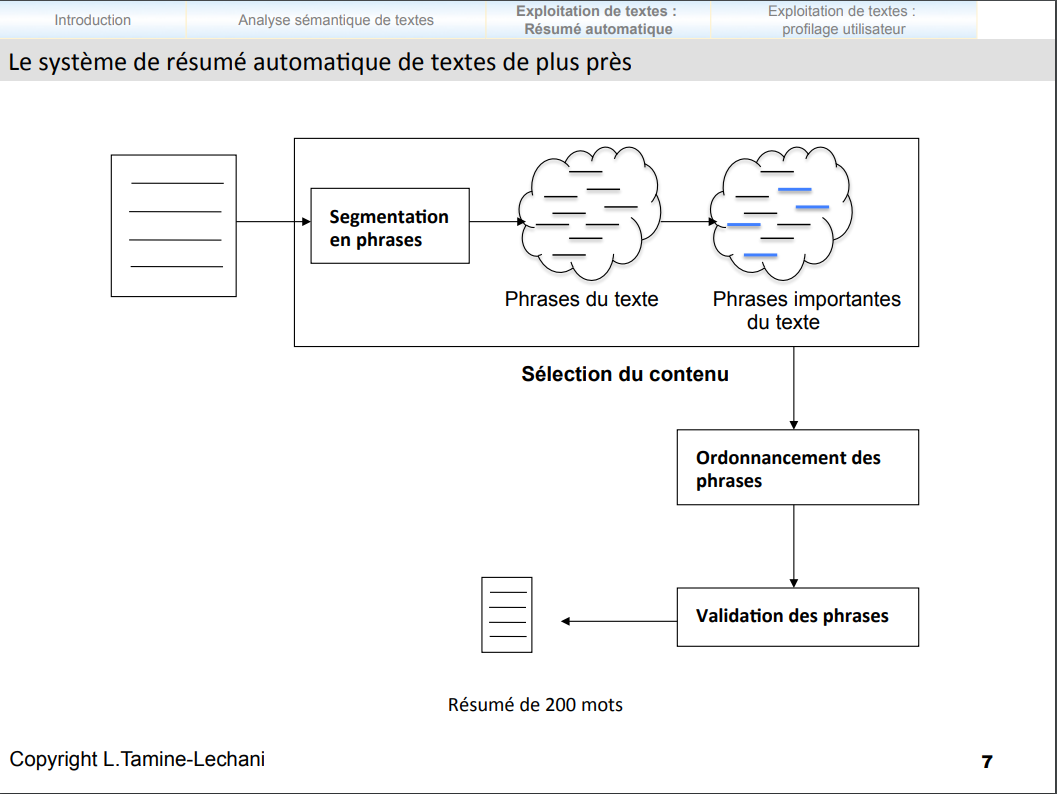

## 1. Collection

Téléchargez le fichier Critiques.zip et décompressez-le (le commandes sont ci- dessous). Ce fichier contient sur le dossier « projects/test-summarization » trois dossiers : « reference », « system » et « topics ». Dans « topics » vous trouverez 5 fichiers et chaque fichier contient plusieurs phrases (1 par ligne), ces seront notres documents à résumer (ou les documents d’entrée). Dans « reference » vous trouverez 5 fichiers avec le résumé de chaque topique fait manuellement par un humain. Finalement, dans « system » vous devez créer 5 fichiers avec le résumé de votre système. Un résumé naïf est déjà dans le dossier « system », il consiste à utiliser les 5 premières lignes de chaque document d’entré (dossier « topics »). Notez que vous pouvez facilement améliorer ces résultats.

In [1]:
!rm -rf Critiques*
!gdown --id 1_fdHg9UgtVPEBvBqFKE4tavn05HMeK3X
!unzip -qq Critiques.zip
!echo "*****"
!ls Critiques/projects/test-summarization/

Downloading...
From: https://drive.google.com/uc?id=1_fdHg9UgtVPEBvBqFKE4tavn05HMeK3X
To: /content/Critiques.zip
100% 39.5M/39.5M [00:02<00:00, 18.7MB/s]
*****
reference  system  topics


In [3]:
import nltk

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [190]:
cd Critiques

[Errno 2] No such file or directory: 'Critiques'
/content/Critiques


In [6]:
!head projects/test-summarization/topics/*
# !head projects/test-summarization/reference/*
# !head projects/test-summarization/system/*

==> projects/test-summarization/topics/battery-life_netbook_1005ha.txt.data <==
6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery  , and a 1 .
 Not to mention that as of now Asus will not sell you a spare 3 or 6, cell Li, Ion battery .
 It also features a N270 cpu, 6, cell 48Wh Li, ion Battery 8 .
3MP webcam, 6, Cell 63Wh Li, ion Battery with a whopping 10 .
 Realistic battery numbers are between 8 .
 of battery life if you're using wifi & doing email word processing YouTube web surfing .
 The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .
 A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .
 In addition the ac adapter does get quite hot while it is actively charging the battery, which Asus clearly mentions in the user manual, so

## 2. Évaluation

Utilisez le fichier jar pour évaluer le système naïf, pour le faire utilisez la commande (sur une console) :

```
!java -jar rouge2-1.2.1.jar     
```
Vous aurez comme sortie :
```
========Results Summary=======

ROUGE-L+StopWordRemoval	PRICE	AMAZON	Average_R:0.50000	Average_P:0.11538	Average_F:0.18750	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	PRICE	AMAZON	Average_R:0.46154	Average_P:0.09836	Average_F:0.16216	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	PRICE	AMAZON	Average_R:0.09091	Average_P:0.01786	Average_F:0.02985	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	PRICE	AMAZON	Average_R:0.22222	Average_P:0.03922	Average_F:0.06667	Num Reference Summaries:1


ROUGE-L+StopWordRemoval	SOUND	IPOD	Average_R:0.28571	Average_P:0.05128	Average_F:0.08696	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	SOUND	IPOD	Average_R:0.28571	Average_P:0.04167	Average_F:0.07273	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	SOUND	IPOD	Average_R:0.20000	Average_P:0.02326	Average_F:0.04167	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	SOUND	IPOD	Average_R:0.18750	Average_P:0.01579	Average_F:0.02913	Num Reference Summaries:1


ROUGE-L+StopWordRemoval	BATTERY-LIFE	NETBOOK	Average_R:0.25000	Average_P:0.09091	Average_F:0.13333	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	BATTERY-LIFE	NETBOOK	Average_R:0.33333	Average_P:0.05660	Average_F:0.09677	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	BATTERY-LIFE	NETBOOK	Average_R:0.00000	Average_P:0.00000	Average_F:0.00000	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	BATTERY-LIFE	NETBOOK	Average_R:0.16000	Average_P:0.01860	Average_F:0.03333	Num Reference Summaries:1


ROUGE-L+StopWordRemoval	ROOM	HOLIDAY	Average_R:0.37500	Average_P:0.06383	Average_F:0.10909	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	ROOM	HOLIDAY	Average_R:0.37500	Average_P:0.04918	Average_F:0.08696	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	ROOM	HOLIDAY	Average_R:0.00000	Average_P:0.00000	Average_F:0.00000	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	ROOM	HOLIDAY	Average_R:0.13043	Average_P:0.01176	Average_F:0.02158	Num Reference Summaries:1


ROUGE-L+StopWordRemoval	SPEED	WINDOWS7.TXT.SYS.HEAD5	Average_R:0.20000	Average_P:0.08333	Average_F:0.11765	Num Reference Summaries:1


ROUGE-1+StopWordRemoval	SPEED	WINDOWS7.TXT.SYS.HEAD5	Average_R:0.18750	Average_P:0.06122	Average_F:0.09231	Num Reference Summaries:1


ROUGE-2+StopWordRemoval	SPEED	WINDOWS7.TXT.SYS.HEAD5	Average_R:0.07692	Average_P:0.02273	Average_F:0.03509	Num Reference Summaries:1


ROUGE-SU4+StopWordRemoval	SPEED	WINDOWS7.TXT.SYS.HEAD5	Average_R:0.08000	Average_P:0.02041	Average_F:0.03252	Num Reference Summaries:1


======Results Summary End======
```



In [7]:
!java -jar rouge2-1.2.1.jar

2021-10-07 10:07:22 INFO  SettingsUtil:33 - Using rouge.properties='/content/Critiques/rouge.properties'
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on price ngram=L
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on price ngram=1
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on price ngram=2
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on price ngram=SU4
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on sound ngram=L
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on sound ngram=1
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on sound ngram=2
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on sound ngram=SU4
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on battery-life ngram=L
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on battery-life ngram=1
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on battery-life ngram=2
2021-10-07 10:07:22 INFO  ROUGECalculator:203 - Working on battery-


Notez que les valeurs de ROUGE-L, ROUGE-1, ROUGE-2 et ROUGE-SU4 sont affichées en termes de Rappel, Précision et F-mesure. Les résultats sont calculés pour les 5 topiques que nous avons : « battery life netbook », « price amazon kindle », « room holiday inn london », « sound ipod nano 8g » et « speed windows 7 ».

Pour voir que les résultats de la f-measure **ROUGE-L** de chaque topique utilisez 

In [47]:
!java -jar rouge2-1.2.1.jar  | grep "ROUGE-L" | awk '{split($6,a,":"); print a[2];}'  ## Rappel

0.18750
0.08696
0.13333
0.10909
0.11765


In [189]:
!java -jar rouge2-1.2.1.jar  | grep "ROUGE-1" | awk '{split($6,a,":"); print a[2];}'  ## Rappel

java.io.UncheckedIOException: java.io.IOException: Is a directory
	at java.base/java.nio.file.FileChannelLinesSpliterator.readLine(FileChannelLinesSpliterator.java:176)
	at java.base/java.nio.file.FileChannelLinesSpliterator.forEachRemaining(FileChannelLinesSpliterator.java:116)
	at java.base/java.util.stream.ReferencePipeline$Head.forEach(ReferencePipeline.java:658)
	at com.rxnlp.tools.rouge.ROUGECalculator.getSystemSents(ROUGECalculator.java:313)
	at com.rxnlp.tools.rouge.ROUGECalculator.evaluate(ROUGECalculator.java:209)
	at com.rxnlp.tools.rouge.ROUGECalculator.start(ROUGECalculator.java:172)
	at com.rxnlp.tools.rouge.ROUGECalculator.main(ROUGECalculator.java:96)
Caused by: java.io.IOException: Is a directory
	at java.base/sun.nio.ch.FileDispatcherImpl.pread0(Native Method)
	at java.base/sun.nio.ch.FileDispatcherImpl.pread(FileDispatcherImpl.java:54)
	at java.base/sun.nio.ch.IOUtil.readIntoNativeBuffer(IOUtil.java:274)
	at java.base/sun.nio.ch.IOUtil.read(IOUtil.java:245)
	at java.

In [9]:
!java -jar rouge2-1.2.1.jar    | grep "ROUGE-1" | awk '{split($6,a,":"); print a[2];}' ## Precision

0.16216
0.07273
0.09677
0.08696
0.09231


In [10]:
!java -jar rouge2-1.2.1.jar    | grep "ROUGE-2" | awk '{split($6,a,":"); print a[2];}' ## F-mesure

0.02985
0.04167
0.00000
0.00000
0.03509


## 3. Documents

Inspectez les documents sur le dossier « topics ». Calculez de statistiques basiques de chaque fichier, comme par exemple le nombre de lignes, de mots, mots plus fréquents, etc.

In [11]:
!head projects/test-summarization/topics/*

==> projects/test-summarization/topics/battery-life_netbook_1005ha.txt.data <==
6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery  , and a 1 .
 Not to mention that as of now Asus will not sell you a spare 3 or 6, cell Li, Ion battery .
 It also features a N270 cpu, 6, cell 48Wh Li, ion Battery 8 .
3MP webcam, 6, Cell 63Wh Li, ion Battery with a whopping 10 .
 Realistic battery numbers are between 8 .
 of battery life if you're using wifi & doing email word processing YouTube web surfing .
 The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .
 A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .
 In addition the ac adapter does get quite hot while it is actively charging the battery, which Asus clearly mentions in the user manual, so

In [12]:

montableau = [x.strip() for x in open('/content/Critiques/projects/test-summarization/topics/sound_ipod_nano_8gb.txt.data', encoding='windows-1252')]
montableau[:5]

['headphone jack i got a clear case for it and it  i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .',
 'Picture and sound quality are excellent for this typ of devic .',
 'Great sound, easy to load & use once I read the instructions .',
 'The music I loaded sounds clear and crisp .',
 'As for the overall sound I would give it a 8 out of 10, and the volume offers itself loud enough to tune out everything else at your local gym .']

In [13]:
from os import listdir
from os.path import isfile, join

## Prints the current directory as a list (including file types)
liste_=(listdir('/content/Critiques/projects/test-summarization/topics'))
liste_

['speed_windows7.txt.data',
 'battery-life_netbook_1005ha.txt.data',
 'sound_ipod_nano_8gb.txt.data',
 'price_amazon_kindle.txt.data',
 'room_holiday_inn_london.txt.data']

## 4. Tableau
 Pour chaque document dans le dossier topiques et à l’aide de python, stockez toutes le lignes dans un tableau de tel façon que chaque ligne corresponde à une dimension du tableau.

In [14]:
# complétez le code
montableau = [x.strip() for x in open('/content/Critiques/projects/test-summarization/topics/battery-life_netbook_1005ha.txt.data', encoding='windows-1252')]
montableau[:5]

['6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery  , and a 1 .',
 'Not to mention that as of now Asus will not sell you a spare 3 or 6, cell Li, Ion battery .',
 'It also features a N270 cpu, 6, cell 48Wh Li, ion Battery 8 .',
 '3MP webcam, 6, Cell 63Wh Li, ion Battery with a whopping 10 .',
 'Realistic battery numbers are between 8 .']

In [15]:
en_stops = set(stopwords.words('english'))

In [44]:
stats={}
Tableau=[]
for topic in liste_:
  stat_topic : dict = {}
  count_words : int = 0
  occurancy_words : dict = {}
  words_2: list =[]
  print('-------------------------------')
  print(topic)
  result=[x.lower().strip().replace(',','').replace('!','').replace('&','').replace(':','').replace('\'','') for x in open('/content/Critiques/projects/test-summarization/topics/'+str(topic), encoding='windows-1252')]
  print(result)
  stat_topic['corpus']=result
  Tableau.append(result)
  stat_topic['nombre de phrase']=len(result)
  words=[sentence.split() for sentence in result]
  count_words=sum([len(liste) for liste in words])
  [[words_2.append(w) for w in liste if w not in en_stops]for liste in words]
  print(words_2)
  stat_topic['nombre de mots']=count_words
  occurancy_words=dict(Counter(words_2).most_common())
  words_most_scores,scores=(list(zip(*[sorted(occurancy_words.items(), key=lambda t: t[1],reverse=True)][0])))
  print('first 5 list occurancy words',words_most_scores[:5])
  stat_topic['5 most common words']=words_most_scores[:5]
  stats[str(topic)]=stat_topic
  print(stats)
  



-------------------------------
speed_windows7.txt.data
['windows 7 is quite simply faster more stable boots faster goes to sleep faster comes back from sleep faster manages your files better and on top of that its beautiful to look at and easy to use .', ' faster about 20% to 30% faster at running applications than my vista   seriously', 'yes itll make your computer run a bit slower but', '  fast startup and performance', 'also in my non benchmarked experience windows 7 has been at least as fast as xp if not faster .', 'its fast secure stable visually appealing and fun to use .', 'for these two computers normal use is pretty fast   not quite as fast as windows xp sp3 but very close .', 'it loads blazing fast software runs smooth and even downloads from the internet seem to be faster .', 'xp sp3 performance comparison  smaller resource footprint and faster start shutdown wake times .', 'other than that it starts up pretty fast .', 'its faster to load easier to use and it has a new feat

#### Outils

In [79]:
import numpy as np
import math
from tqdm import tqdm
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
wordnet.synsets('dog')[0]

Synset('dog.n.01')

In [131]:
# PPMI
def fenetreGlisant(texte,taille):
  partes = texte.split()
  partes2=[partes[i:i+taille] for i in range(len(texte)-1)]
  return partes2

def nettoyage_texte(texte):
   return texte.replace(',','').replace('(','').replace(')','').replace('.','')

def calculerPPMI(px,py,pxy):
  pmi = pxy/(px*py)
  if pmi> 0:
     return (math.log(pmi))
  else:
     return 0

def calculerpx(mot,fenetres): ## nb d'apparition d'un mot dans une fenetre
  d : dict= {}
  for (i,fenetre) in enumerate(fenetres) :
    d[i]=fenetre.count(mot)
  n_app_word_all_ctxt=sum(d.values())
  n_tot= len(fenetres)
  return n_app_word_all_ctxt/n_tot

def calculerpxy(mot1,mot2,fenetres): # nb dapparition du mot1 et mot 2 dans une fenetre
  d=[1 if mot1 in fenetre and mot2 in fenetre else 0 for fenetre in fenetres]
  n_app_word1_word2=sum(d)
  n_tot= len(fenetres)
  return n_app_word1_word2/n_tot

def Poids_PPMi(doc,k):
  Poids_S=[]
  for sentence1 in tqdm(doc[:len(doc)//2]): 
    fenetres1 = fenetreGlisant(sentence1,k)
    N1=len(sentence1.split())
    for sentence2 in doc[len(doc)//2:]:
      fenetres2=fenetreGlisant(sentence2,k)
      N2=len(sentence2.split())
      sim_sens1_sens2=np.zeros((N1,N2))
      for i,mot1 in enumerate(sentence1.split()):
        for j,mot2 in enumerate(sentence2.split()):  
          sim_sens1_sens2[i][j]=calculerPPMI(calculerpx(mot1,fenetres1),calculerpx(mot2,fenetres2),calculerpxy(mot1,mot2,fenetres1))
    Poids_S.append(1-np.mean(sim_sens1_sens2))
  return Poids_S


def Poids_wordnet(doc):
  Poids_S=[]
  for sentence1 in tqdm(doc[:len(doc)//2]): 
    N1=len(sentence1.split())
    for sentence2 in doc[len(doc)//2:]:
      N2=len(sentence2.split())
      sim_sens1_sens2=np.zeros((N1,N2))
      for i,mot1 in enumerate(sentence1.split()):
        try:
          v1=wordnet.synsets(mot1)[0]
          for j,mot2 in enumerate(sentence2.split()):  
            try:
              result=v1.path_similarity(wordnet.synsets(mot2)[0])
              sim_sens1_sens2[i][j]=(result if result is not None else 0)
            except:
              sim_sens1_sens2[i][j]=0
              pass
        except:
          pass   
    Poids_S.append(1-np.mean(sim_sens1_sens2))
  return Poids_S    



In [133]:
vect=Poids_wordnet(Tableau[0])


100%|██████████| 62/62 [00:58<00:00,  1.05it/s]


[('room', 547),
 ('.', 528),
 ('clean', 118),
 ('small', 100),
 ('rooms', 99),
 ('hotel', 85),
 ('bathroom', 75),
 ('bed', 59),
 ('size', 53),
 ('good', 50),
 ('london', 48),
 ('comfortable', 39),
 ('floor', 38),
 ('time', 33),
 ('great', 33),
 ('one', 31),
 ('us', 28),
 ('would', 28),
 ('breakfast', 28),
 ('service', 27),
 ('staff', 27),
 ('nice', 26),
 ('check', 26),
 ('also', 26),
 ('although', 24),
 ('well', 24),
 ('double', 23),
 ('hotels', 23),
 ('night', 23),
 ('day', 22),
 ('large', 22),
 ('got', 21),
 ('standard', 21),
 ('bit', 21),
 ('two', 20),
 ('shower', 20),
 ('water', 19),
 ('beds', 19),
 ('holiday', 19),
 ('smoking', 19),
 ('executive', 19),
 ('fridge', 19),
 ('booked', 19),
 ('ready', 18),
 ('stayed', 18),
 ('bar', 17),
 ('big', 17),
 ('enough', 17),
 ('like', 17),
 ('wasnt', 17),
 ('available', 17),
 ('however', 17),
 ('desk', 16),
 ('inn', 16),
 ('even', 16),
 ('get', 16),
 ('stay', 16),
 ('view', 16),
 ('quiet', 15),
 ('door', 15),
 ('given', 15),
 ('could', 14),
 (

In [178]:
a= [(i, val) for i,val in enumerate(vect)]
a.sort(key = lambda a: a[1])
index,score=list(zip(*a))
print(index)
resume=[Tableau[0][i] for i in index[:5]]



(58, 29, 51, 60, 17, 44, 34, 55, 61, 36, 28, 46, 19, 21, 59, 20, 35, 53, 45, 40, 50, 23, 30, 43, 7, 16, 12, 32, 25, 37, 27, 2, 15, 31, 11, 13, 10, 41, 5, 22, 56, 4, 3, 54, 6, 18, 47, 0, 26, 38, 52, 8, 33, 57, 24, 9, 39, 48, 49, 42, 1, 14)


In [179]:
resume

['also connect time is way faster .',
 'when i ran vista it was a bit slower .',
 'i installed the 64bit version and it made my computer respond a lot faster .',
 'i have been running win7 for a week now and and it is at least twice as fast as win2k   .',
 'although win 7 seems a bit faster than vista did i do not notice any decrease in the start up time .']

['also connect time is way faster .',
 'when i ran vista it was a bit slower .',
 'i installed the 64bit version and it made my computer respond a lot faster .',
 'i have been running win7 for a week now and and it is at least twice as fast as win2k   .',
 'although win 7 seems a bit faster than vista did i do not notice any decrease in the start up time .']

## 5. Résumé

Calculez un résumé automatique en utilisant l’algorithme du cours (diapo 11). Alternativement, vous pouvez calculer la similarité de chaque ligne avec toutes les autres lignes du même tableau. Pour ça, vous pouvez utiliser ***wordnet***, ***ppmi***, la formule donné en cours basés sur le ***tf-idf*** ou les ***word embeddings***. 

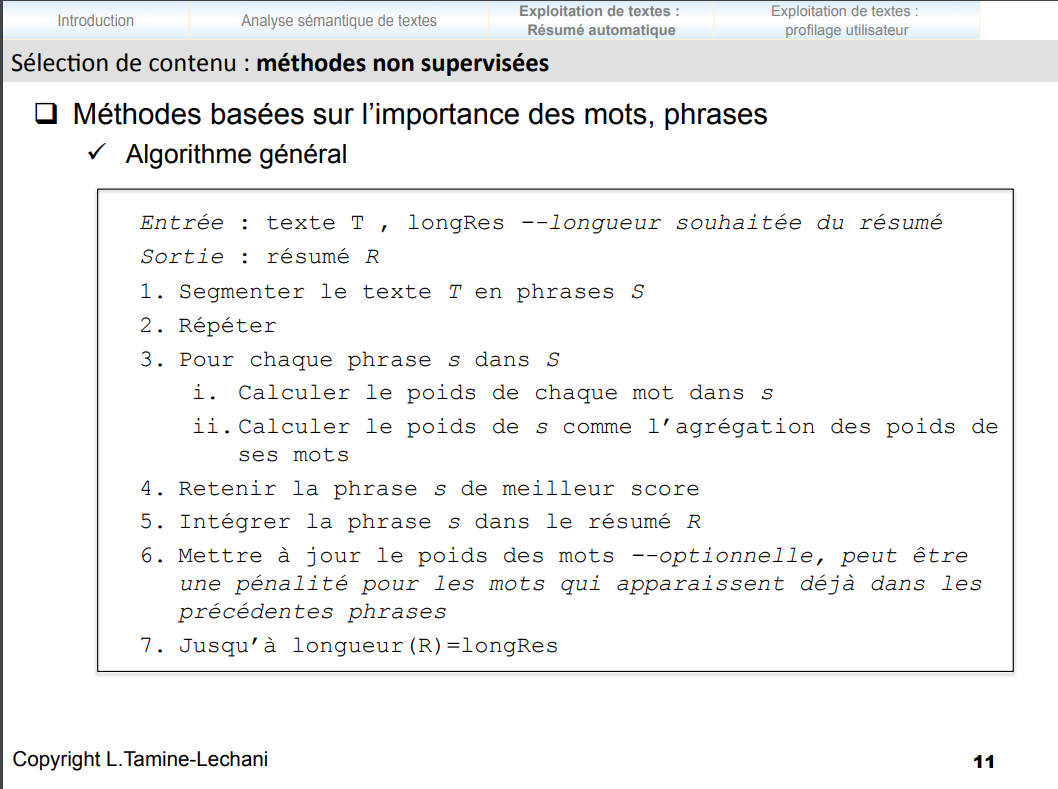

In [180]:
def resume(doc,doc_poids):
  a= [(i, val) for i,val in enumerate(doc_poids)]
  a.sort(key = lambda a: a[1])
  index,score=list(zip(*a))
  resume=[doc[i] for i in index[:5]]
  return resume


## 6. Sauvegarde

Sauvegardez votre résumé de chaque document d’entrée dans le dossier « system » en écrasant les fichiers existants.

In [184]:
import pandas as pd

In [186]:
pd.DataFrame(resume(Tableau[0],vect)).to_csv('/content/Critiques/projects/test-summarization/system/speed_windows7.txt.sys.head',header=None,index=False)

## 7. Évaluation 2
Calculez à nouveau les valeurs de ROUGE en utilisant le fichier jar comme dans le point 2. Avez-vous une amélioration par rapport au système naïf ? Si non, vérifiez les étapes 4 et 5 jusqu’à trouver un une amélioration dans les résultats.

## 8. Alternatives 

Utilisez une autre méthode (ou d’autres paramètres de votre système) pour améliorer encore vos résultats.